In [1]:
import pickle

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from matplotlib.lines import Line2D
import seaborn as sns
import distinctipy

from scipy.integrate import simpson
from numpy import trapz
import statistics as st

In [2]:
# classes = ['Airplane', 'Bear', 'Bicycle', 'Bird', 'Boat', 'Bottle', 'Car', 'Cat', 'Chair', 'Clock', 'Dog', 'Elephant', 'Keyboard', 'Knife', 'Oven', 'Truck' ]
classes = ['Airplane', 'Bear', 'Bicycle', 'Car', 'Chair', 'Dog', 'Elephant', 'Truck', ]
n = len(classes)

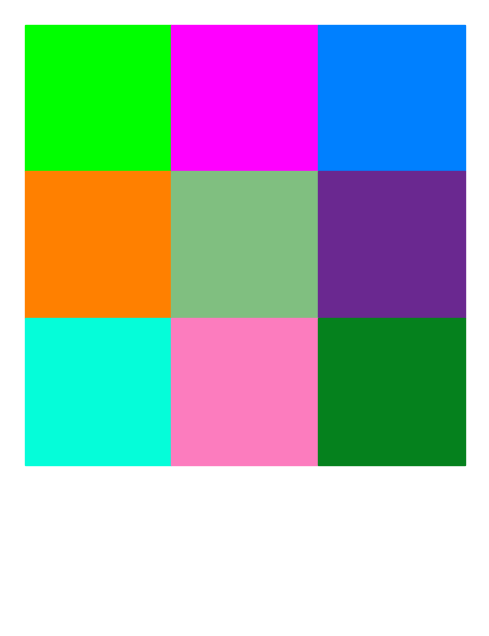

In [3]:
colors = distinctipy.get_colors(n+1, pastel_factor=0.0)
distinctipy.color_swatch(colors)

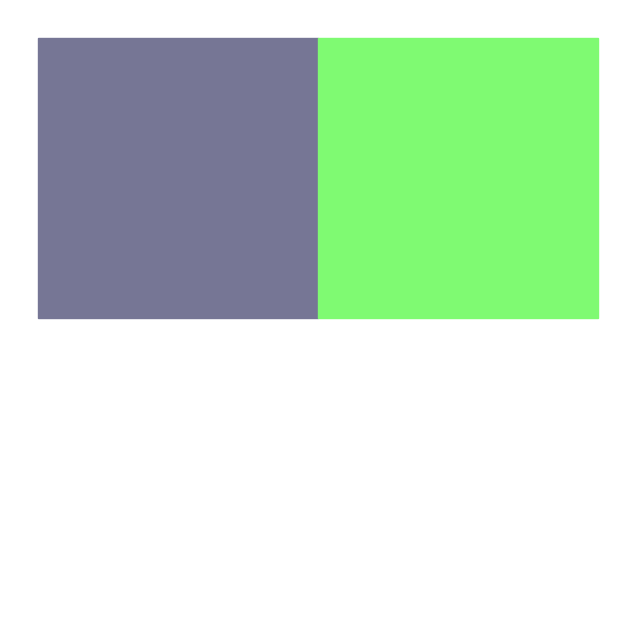

In [4]:
bicolors = distinctipy.get_colors(2, pastel_factor=0.8)
distinctipy.color_swatch(bicolors)

In [5]:
cmap = distinctipy.get_colormap(colors) # matplotlib.cm.get_cmap('Set3')
bicmap = distinctipy.get_colormap(bicolors[::-1])
k = 10
classes   += ['All Classes']
plot_names = ["k-Space", "MonoChromatic k-Space", "k*", "Sorted k*", "k* Distribution"]
single_plot_names = ["Single Plot k* Distribution"]

In [6]:
def analyse_k_space(neighbours):
    
    index, length1, length2, clss   = [], [], [], []
    binary_neighbours = []
    
    for i, v in enumerate(neighbours):
        
        index.extend([i])
        
        cls = v[0]
        
        xs = []
        vs = [v[i:] for i in range(1, k+1)]
        
        for ix in range(1, k+1):
            x = np.where(list(map(lambda *args: cls not in args, *vs[:ix])))[0]
            xs.append(0 if len(x) == 0 else x[0])
        
        length1.append(xs)
        clss.extend([v[xs[0]+1]])
        
        xs = []
        vs = [v[i:] for i in range(1, k+1)]
        
        for ix in range(1, k+1):
            x = np.where(list(map(lambda *args: cls not in st.multimode(args), *vs[:ix])))[0]
            xs.append(0 if len(x) == 0 else x[0])
        
        length2.append(xs)
        
        # if np.bincount(v[:500].astype(int)).argmax() != i:
        #     x = -1*(9999 + np.bincount(v[:500].astype(int)).argmax() + x)
        
        binary_neighbours.append(np.where(v == cls, 1, 0))
    
    length1 = np.array(length1)
    length2 = np.array(length2)
    binary_neighbours = np.array(binary_neighbours)
    
    values = {'index':index,  'class':clss}
    
    for i in range(len(xs)):
        values[f"k*_{i+1}"] = list(length1[:, i])
        values[f"k+_{i+1}"] = list(length2[:, i])
    
    values[f"k*_mean"] = list(length1.mean(axis=1))
    values[f"k+_mean"] = list(length2.mean(axis=1))
    
    df = pd.DataFrame(values).sort_values(['k*_1', 'class'], ascending = [True, True])
    
    return df, binary_neighbours

    # sort_list = df['index'].tolist()
    
    # return neighbours[sort_list], binary_neighbours[sort_list], df

In [7]:
def run(test_name, model_name, train_name, tabular):
    
    
    
    # def plot_kSpace_2D(space, ax, i, class_name, **kwargs):
    #     ax[i].imshow(space[:, :100], cmap=bicmap if len(np.unique(space)) == 2 else cmap, aspect="auto")
    #     ax[i].set(title=f"Class: {class_name}", xlabel="Class of kth-Neighbour", ylabel="Points", yticks=[],)
    
    # def plot_klength(length, ax, i, class_name, **kwargs):
    #     num_elements = len(length)
    #     sns.lineplot(x=length, y=np.arange(1, num_elements + 1), ax=ax[i], color=cmap(i),)
    #     ax[i].fill_betweenx(np.arange(1, num_elements + 1), length, np.zeros(num_elements), color=cmap(i), alpha=0.2)
    #     ax[i].set(title=f"{class_name}: {np.mean(length):.2f}±{np.std(length):.2f}", xlabel="Cluster Boundary Distance", ylabel="Points")
    
    # def plot_kMetricDistribution(length, ax, i, class_name, **kwargs):
    #     sns.histplot(x=length, color=cmap(i), kde=True, kde_kws={'cut':0, 'bw_adjust':.2}, ax=ax[i])
    #     # sns.kdeplot(x=length, cut=0, color=cmap(i), bw_adjust=.2, ax=ax[i])
    #     ax[i].set(title=f"{class_name}", xlabel="Cluster Boundary Distance", ylabel="Number of Points")
    
    # functions = [plot_kSpace_2D, plot_kSpace_2D, plot_klength, plot_klength, plot_kMetricDistribution]
    # figs = [plt.figure(i, figsize=(110, 10)) for i in range(1, len(plot_names)+1)]
    # axes = [fig.subplots(nrows=1, ncols=n+1) for fig in figs]
    
    # def plot(args, **kwargs):  
    #     for func, arg, ax in zip(functions, args, axes):
    #         func(arg, ax, **kwargs) 
    #     plot_kSpace_2D(args[0], axes[0], i, class_name)
    #     plot_kSpace_2D(args[1], axes[1], i, class_name)
    #     plot_klength(args[2], axes[2], i, class_name)
    #     plot_klength(args[3], axes[3], i, class_name)
    #     plot_kMetricDistribution(args[4], axes[4], i, class_name)
    
    def plot_kMetricDistribution_Single_Plot(df, ax, **kwargs):
        
        # quartiles = [0.382924922548026, 0.682689492137086, 0.866385597462284, 0.954499736103642]
        quartiles = [0.25, 0.5, 0.75]
        for quartile in quartiles:
            ax.axvline(x=(quartile*80), ymin=0, ymax=1, color='k', linestyle='--')
            
        sns.violinplot(data=dfs, x="k*_1", y="class_name", palette=colors, ax=ax, cut=0, inner='stick')
        
        for violin in ax.collections[::2]:
            violin.set_alpha(0.4)
        
        sns.swarmplot(data=dfs, x="k*_1", y="class_name", size=1.5, palette=colors, edgecolor='k', ax=ax)
        # sns.kdeplot(data=df, x='k*_1', hue='class_name', cut=0, cmap=cmap, bw_adjust=.2, ax=ax)
        ax.set(title=f"k* Cluster Boundary Distance", xlabel="Cluster Boundary Distance", ylabel="Number of Points")
    
    sfigs = [plt.figure(i+len(plot_names), figsize=(10, 20)) for i in range(1, len(single_plot_names)+1)]
    saxes = [fig.subplots(nrows=1, ncols=1) for fig in sfigs]
       
    load_path = f'./neighbor_dict/{test_name}_to_{model_name}-{train_name}_neighbors_dict.pkl'
    with open(load_path, mode='rb') as f:
        v_dicts = pickle.load(f)

    # load_path = f'./prediction_dict/{test_name}_to_{model_name}-{train_name}_prediction_dict.pkl'
    # with open(load_path, mode='rb') as f:
    #     p_dicts = pickle.load(f)
    # points = np.array([v_dicts[c.lower()] for c in classes[:n+1]])
    
    # points = []
    dfs    = []
    
    # for i, (class_name, class_points) in enumerate(v_dicts.items()):
    for i, class_name in enumerate(classes[:-1]):
        class_points = v_dicts[class_name.lower()]
         
        df, binary_class_points = analyse_k_space(class_points)
        df['class_name'] = class_name
        dfs.append(df)
        
        # points.extend(class_points)
       
        # sort_idx = df['index'].tolist()
        # column = f"k*_1"
        # length = df[column].tolist()[::-1]
        # sorted_length = sorted(length, reverse=True)
        
        # Compute the area using the composite trapezoidal rule.
        # area = trapz(sorted_length, dx=1)
        # Compute the area using the composite Simpson's rule.
        # area = simpson(sorted_length, dx=1)
        
        # plot([class_points[sort_idx], binary_class_points[sort_idx], length, sorted_length, length], i=i, class_name=class_name)
    
    dfs = pd.concat(dfs)
    # class_points = np.array(points)
    
    # df, binary_class_points = analyse_k_space(class_points)
    # sort_idx = df['index'].tolist()
    # column = f"k*_1"
    # length = df[column].tolist()[::-1]
    # sorted_length = sorted(length, reverse=True)

    # plot([class_points[sort_idx], binary_class_points[sort_idx], length, sorted_length, length], i=len(classes)-1, class_name=classes[-1])
    
    plot_kMetricDistribution_Single_Plot(dfs, saxes[0])
    
    # for plot_name, fig in zip(plot_names, figs):
    #    fig.tight_layout()
    #    fig.savefig(f"./plots/{test_name}_to_{model_name}-{train_name} {plot_name}.png", dpi=300)
    #    fig.clear()
    
    for plot_name, fig in zip(single_plot_names, sfigs):
        
        fig.tight_layout()
        fig.savefig(f"./plots/{test_name}_to_{model_name}-{train_name} {plot_name}.png", dpi=300)
        fig.clear()
    
    mean = dfs.groupby(['class_name'])["k*_1"].mean().to_dict()
    std  = dfs.groupby(['class_name'])["k*_1"].std().to_dict()

    data = {}
    data['Name'] = f"{model_name}-{train_name}-{test_name}"

    for key in mean.keys():
        data[key] = f"{mean[key]:.2f}±{std[key]:.2f}"

    tabular = tabular.append(data, ignore_index=True)

    return tabular

In [8]:
model_names  = ["ViT", "ViT"]
train_names  = ["IN", "SIN"]
test_names   = ["IN", "SIN", "cropIN", "noiseIN", "rotateIN", "cropSIN", "noiseSIN", "rotateSIN"]

tabular = pd.DataFrame()

for model_name in model_names[:1]:
    for train_name in train_names[:1]:
        for test_name in test_names[:1]:
            
            tabular = run(test_name, model_name, train_name, tabular)
            
            # try:
            #     print(model_name, train_name, test_name)
            #     run(test_name, model_name, train_name)
            # except Exception as e:
            #     print(e)

/tmp/ipykernel_1711/6811466.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabular = tabular.append(data, ignore_index=True)


<Figure size 1000x2000 with 0 Axes>

In [9]:
print(tabular.to_latex(index=False))

\begin{tabular}{lllllllll}
\toprule
     Name &    Airplane &      Bear &   Bicycle &       Car &     Chair &       Dog &    Elephant &     Truck \\
\midrule
ViT-IN-IN & 25.20±21.10 & 1.46±2.34 & 1.21±2.66 & 2.27±3.56 & 0.66±1.50 & 0.72±1.20 & 12.90±15.14 & 1.49±2.29 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1711/157526873.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tabular.to_latex(index=False))
